### Importação de bibliotecas

In [521]:
# Bibliotecas de Data Science
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Separação dos dados
from sklearn.model_selection import train_test_split

# Algoritimos de Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Padronização dos dados
from sklearn.preprocessing import StandardScaler

# Metrica de avaliação 
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score 

# Outras bibliotecas
from matplotlib import pyplot as plt
from matplotlib import pyplot
import itertools
from sklearn.model_selection import GridSearchCV

### Importação de dados

Até o momento foram recebidas duas bases da basf: uma de nps e outra de vendas.

In [522]:
vendas = pd.read_excel('vendas_basf.xlsx')
nps = pd.read_excel('nps_basf.xlsx')

### Exploratória

In [523]:
vendas.shape 

(66183, 7)

In [524]:
nps.shape 

(39581, 24)

A base de vendas possui 66.189 linhas e 12 colunas e a base de nps possui 39.583 linhas e 24 colunas

In [525]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39581 entries, 0 to 39580
Data columns (total 24 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Survey ID                                           39581 non-null  int64         
 1   Contact Country                                     39581 non-null  object        
 2   Job Title                                           39560 non-null  object        
 3   Contact Department                                  39566 non-null  object        
 4   Sold to                                             39581 non-null  object        
 5   Lead Contact OD                                     39580 non-null  object        
 6   Main Industry                                       38284 non-null  object        
 7   Customer Network                                    39581 non-null  object        
 8   Local 

In [526]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66183 entries, 0 to 66182
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SBU                            66183 non-null  object 
 1   Year                           66183 non-null  int64  
 2   Country                        66183 non-null  object 
 3   Sold-to Code (Number version)  66183 non-null  object 
 4   # Products                     66183 non-null  int64  
 5   Net Sales (EUR)                66183 non-null  float64
 6   Base Quantity (Volume-tons)    66183 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.5+ MB


### Análise da base de vendas

In [527]:
for col in vendas.columns:
    print(col)
    print(vendas[col].unique())
    print('---------------------------------------------------------------------------')

SBU
['APF' 'APG' 'APH' 'API' 'APU' 'CCC' 'CCE' 'CCM' 'CCR' 'CIA' 'CIB' 'CIC'
 'CID' 'CMA' 'CMC' 'CMD' 'CMF' 'CMG' 'CMI' 'CMJ' 'CMM' 'CMQ' 'CMT' 'CMU'
 'CPE' 'CPH' 'CPL' 'CPM' 'CPR' 'CPS' 'CPV' 'ECO' 'ECR' 'ECT' 'ED2' 'ED7'
 'EDD' 'EDG' 'EDQ' 'EDR' 'EDU' 'EMB' 'EMO' 'EMU' 'ENB' 'ENF' 'ENH' 'ENL'
 'ENP' 'EVA' 'EVF' 'EVG' 'EVH' 'EVI' 'EVJ' 'EVK' 'EVO' 'EVV' 'G-PM/A'
 'G-PM/P' 'S-PM/S' 'XRE' 'XRS' 'ECD']
---------------------------------------------------------------------------
Year
[2018 2019 2020]
---------------------------------------------------------------------------
Country
['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Ecuador'
 'Not assigned' 'Paraguay' 'Peru' 'Suriname' 'Uruguay' 'Guyana'
 'Venezuela' 'Thailand' 'Germany' 'USA' 'Italy' 'French Guiana' 'DE' 'EC'
 'MX' 'US' 'UZ' '(blank)' 'KR' 'ES']
---------------------------------------------------------------------------
Sold-to Code (Number version)
[1000 629929 845310 ... 6560935 6600774 6854986]
-----------------------

<span style="color:purple">SBU: necessário entender o conceito deste código, não possui dados missing, sendo necessário apenas realizar a conversão para dummies </span> <br> 
<span style="color:green">Year: de 2018 a 2020 sem missings.</span>                          
<span style="color:red">Country: Há duas categorias "Not assigned" e "(blank)" que não representam países, além disso é necessário transformar em dummies</span>               
<span style="color:green">Sold-to Code (Number version): Código do cliente e não tem nenhum dado missing, tudo ok </span><br>
<span style="color:green">Products: campo de código do produto, já como inteiro e sem dados missing, tudo ok.</span><br>           <span style="color:green">Net Sales (EUR): Valor da venda líquida, já como float, sem dados missing, tudo ok. </span>           
<span style="color:green">Base Quantity (Volume-tons): Quantidade em toneladas do produto vendido, já como float, sem dados missing, tudo ok.

### Quantidade de registros que estão sem a variável de país preenchida

In [528]:
print("Qtd total de registros da base de vendas:",vendas.shape[0])
print("Qtd total de registros sem país preenchido:",vendas.query('Country in ("Not assigned","(blank)")').shape[0])

Qtd total de registros da base de vendas: 66183
Qtd total de registros sem país preenchido: 35


Como são apenas 35 registros vazios de um total de 66k optamos por eliminarmos da base.

In [529]:
vendas.query('Country not in ("Not assigned","(blank)")',inplace=True)

### Exploratória das variáveis antes de realizar a conversão para dummies

#### Variável Year e Contry

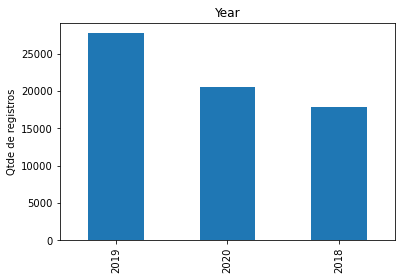

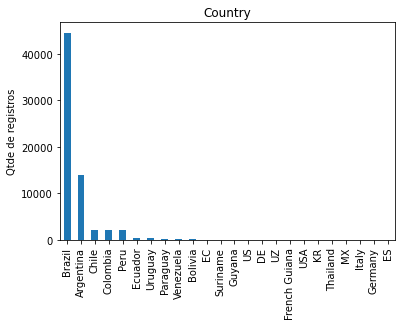

In [530]:
for col in vendas.columns:
    if col in ('Year','Country'):
        vendas[col].value_counts(sort=True).plot(kind='bar')
        plt.title(col)
        plt.ylabel("Qtde de registros")
        plt.show()

Ao que parece as vendas foram aumentando de 2018 para 2019, mas cairam em 2020, e a maior parte das vendas dessa base dizem respeito ao Brasil e países da América do Sul.

Fizemos as análises por quantidade de registros mas vamos confirmar se as afirmações anteriores procedem quando olhamos para a quantidade de toneladas vendidas e para a receita.

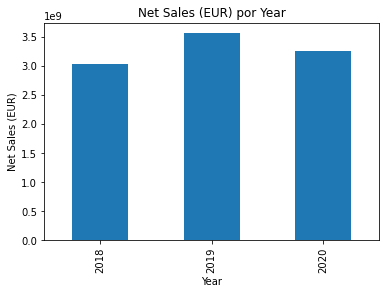

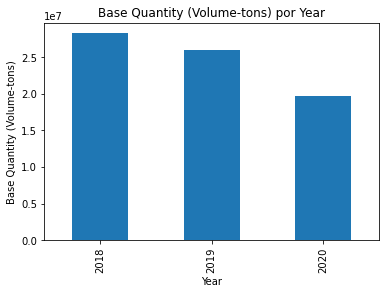

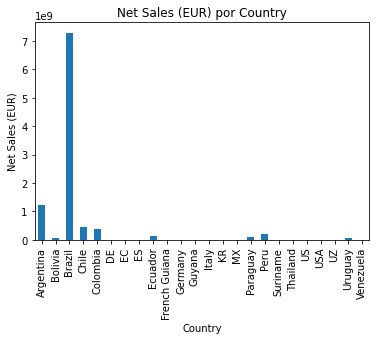

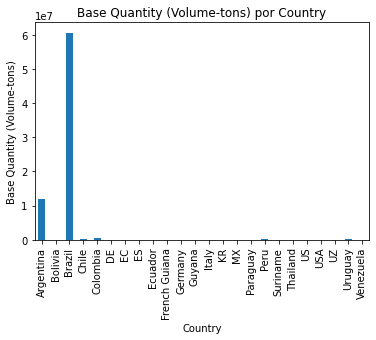

In [531]:
for col in ['Year','Country']:
    for variavel_analisada in ['Net Sales (EUR)','Base Quantity (Volume-tons)']:
        vendas.groupby(col)[variavel_analisada].sum().plot(kind='bar')
        plt.title(variavel_analisada + " por " + col)
        plt.ylabel(variavel_analisada)
        plt.show()

Quanto a análise dos países, o Brasil se manteve como o de maior vendas em toneladas e receita, seguido pela Argentina.

Quando analisamos a receita percebemos que de fato houve um aumento de 2018 para 2019 e uma queda em 2020.

E quando olhamos para a variável de toneladas percebemos algo curioso, a cada ano a venda em toneladas foi diminuindo, mesmo em 2019 quando tivemos um aumento tanto de quantidade de vendas quanto de receita. Uma possível explicação é que a empresa tem focado em produtos com maior valor agregado.

Para confirmar isso vamos analisar a variável produto.

#### Variável Produto

No código abaixo agrupamos inicialmente os valores de vendas e toneladas por produto e ano. <br>

Em seguida incluímos uma nova coluna de receita por tonelada vendida, e a partir desta coluna realizamos a marcação de quartil dos produtos. Produtos que tem um valor de tonelada mais barato entraram no primeiro quartil e os mais caros no último quartil.

In [532]:
Produtos = vendas.groupby(['# Products','Year']).agg({'Net Sales (EUR)':'sum', 'Base Quantity (Volume-tons)':'sum'})
Produtos['Net Sales (EUR)'] = Produtos['Net Sales (EUR)'] / 1000
Produtos['valor_por_ton'] = Produtos['Net Sales (EUR)'] / Produtos['Base Quantity (Volume-tons)']
Produtos['Quartil']= pd.qcut(Produtos['valor_por_ton'],
                             q = 4, labels = False)
Produtos = Produtos[Produtos['Quartil'].notnull()]

Produtos2 = Produtos.groupby(['Quartil','Year']).agg({'Net Sales (EUR)':'sum', 'Base Quantity (Volume-tons)':'sum'})
Produtos2['Net Sales (EUR)'] = Produtos2['Net Sales (EUR)'] / 1000
Produtos2['Base Quantity (Volume-tons)'] = Produtos2['Base Quantity (Volume-tons)'] / 1000
Produtos2.reset_index(inplace=True)

Antes de analisar os gráficos vale entendermos como está a distribuição dos quartis por preço da tonelada.

In [533]:
Produtos.describe()

,Net Sales (EUR),Base Quantity (Volume-tons),valor_por_ton,Quartil
count,1019.000000,1.019000e+03,1019.000000,1019.000000
mean,9684.860621,7.259356e+04,-inf,1.499509
std,28723.078212,2.769782e+05,NaN,1.119022
min,-47777.148220,0.000000e+00,-inf,0.000000
25%,415.243765,3.468009e+02,0.803792,0.500000
50%,1007.392311,9.224806e+02,1.066137,1.000000
75%,3701.303900,3.104998e+03,1.384356,2.500000
max,330652.539660,4.126418e+06,160.974589,3.000000


Olhando para os quartis dos valores por tonelada é possível notar que há produtos outliers que são extremamente mais caros do que o resto da base. Enquanto há valores que estão na casa dos 160 por tonelada a maior parte da base está na faixa de 1 por tonelada. (Lembrando que os valores foram tratados anteriormente para facilitar a leitura e não representam os valores reais em Euro, foram reduzidos para uma escala menor.)

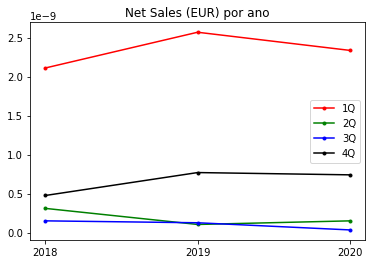

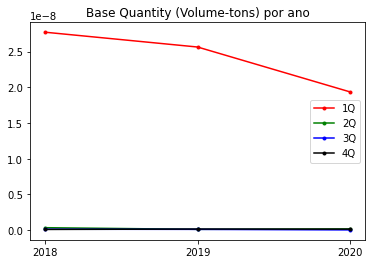

In [534]:
for variavel in ['Net Sales (EUR)','Base Quantity (Volume-tons)']:

    plt.plot(Produtos3.query('Quartil == 0')['Year'],Produtos3.query('Quartil == 0')[variavel],marker='.', color='r', label= '1Q')
    plt.plot(Produtos3.query('Quartil == 1')['Year'],Produtos3.query('Quartil == 1')[variavel],marker='.', color='g', label= '2Q')
    plt.plot(Produtos3.query('Quartil == 2')['Year'],Produtos3.query('Quartil == 2')[variavel],marker='.', color='blue', label= '3Q')
    plt.plot(Produtos3.query('Quartil == 3')['Year'],Produtos3.query('Quartil == 3')[variavel],marker='.', color='black', label= '4Q')
    plt.legend()
    plt.title(variavel + " por ano")
    plt.show();

Analisando como os quartis de preço por tonelada se comportaram tanto em receita como em toneladas ao longo dos anos é possível concluir que o motivo das receitas aumentarem mesmo quando a quantidade de toneladas caiu se deve a dois fatores:

1) Notamos um aumento na receita dos produtos mais caros (4Q) de 2018 para 2019 e uma estabilidade para 2020. Como há produtos nesta categoria que são extremamente mais caros que os demais eles ajudam a aumentar consideravelmente a receita com pouca tonelada vendida.

2) Os valores de receita ($) dos produtos mais baratos (primeiro quartil) aumentaram mesmo quando a quantidade de toneladas desta categoria caiu, que foi o caso de 2019, isso pode ser explicado por possíveis reajustes nos preços dos produtos mais baratos. Vamos verificar:

In [535]:
mais_baratos = Produtos2.query('Quartil == 0')
mais_baratos['valor_por_ton'] = (mais_baratos['Net Sales (EUR)'] / mais_baratos['Base Quantity (Volume-tons)'])
mais_baratos[['Quartil','Year','valor_por_ton']]

<ipython-input-535-ffa4d676e762>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mais_baratos['valor_por_ton'] = (mais_baratos['Net Sales (EUR)'] / mais_baratos['Base Quantity (Volume-tons)'])


,Quartil,Year,valor_por_ton
0,0.0,2018,0.076144
1,0.0,2019,0.100175
2,0.0,2020,0.120617


Conforme suspeitávamos os valores por tonelada dos produtos mais baratos aumentaram consideravelmente ao longo dos anos, essa seria a segunda justificativa para a distorção observada de aumento de receita e queda de tonelada vendida. Vamos continuar analisando as demais variáveis.

#### Variável Sold To (Código do Cliente)

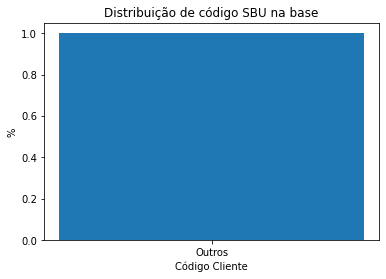

In [536]:
cliente = vendas['Sold-to Code (Number version)'].value_counts(normalize=True).reset_index()
cliente.loc[cliente['Sold-to Code (Number version)'] < 0.01, 'index'] = 'Outros'
cliente = cliente.groupby('index')['Sold-to Code (Number version)'].sum().reset_index()
X = cliente['index']
Y = cliente['Sold-to Code (Number version)']
  
X_axis = np.arange(len(X))
plt.bar(X, Y)
plt.xlabel("Código Cliente")
plt.ylabel("%")
plt.title("Distribuição de código SBU na base")
plt.show()

Ao agruparmos os clientes que possuem menos de 1% de representatividade na quantidade de pedidos percebemos que todos os clientes ficaram agrupados nesta categoria, demonstrando que não existe concentração de quantidade de pedidos em algum cliente, há na verdade, uma base muito diversificada, demonstrando uma sólida e segura carteira de clientes.

#### Variável SBU

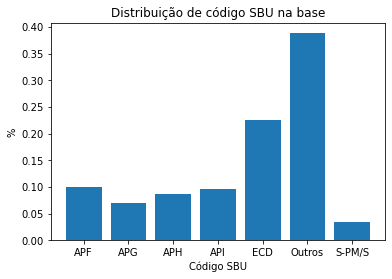

In [537]:
SBU = vendas['SBU'].value_counts(normalize=True).reset_index()
SBU.loc[SBU['SBU'] < 0.03, 'index'] = 'Outros'
SBU = SBU.groupby('index')['SBU'].sum().reset_index()
X = SBU['index']
Y = SBU['SBU']
  
X_axis = np.arange(len(X))
plt.bar(X, Y)
plt.xlabel("Código SBU")
plt.ylabel("%")
plt.title("Distribuição de código SBU na base")
plt.show()

Quase 25% da base é composta pelo código de SBU como ECD e 40% da base é composta por outros códigos que sozinhos representam menos de 3% dos registros.

#### Distribuição da Variável Produto

In [538]:
Produto = vendas['# Products'].value_counts(normalize=True).reset_index()
Produto.loc[Produto['# Products'] < 0.02, 'index'] = 'Outros'
Produto = Produto.groupby('index')['# Products'].sum().reset_index()
Produto

,index,# Products
0,1,0.240370
1,2,0.083616
2,3,0.055875
3,4,0.052126
4,5,0.045247
5,6,0.040047
6,7,0.035693
7,8,0.028784
8,9,0.023901
9,10,0.023961


Assim como na análise de SBU apenas um produto representa 24% dos registros na base de venda e outros produtos que sozinhos não passam de 2% na base, juntos representam 32%. A julgar pelas análises anteriores, a representatividade do produto 1 sugere que ele possivelmente está na categoria dos mais baratos, mas vamos confirmar:

In [539]:
Produtos.head(6)

Net Sales (EUR)  Base Quantity (Volume-tons)  valor_por_ton  \
# Products Year                                                                
0          2018       2728.04970                   452.660000       6.026708   
           2019       1497.91468                   166.688000       8.986338   
           2020       1766.52763                   215.464000       8.198714   
1          2018     258641.33130                571423.563676       0.452626   
           2019     223993.06961                588391.274166       0.380687   
           2020     282745.09315                637691.825536       0.443388   

                 Quartil  
# Products Year           
0          2018      3.0  
           2019      3.0  
           2020      3.0  
1          2018      0.0  
           2019      0.0  
           2020      0.0

Conforme suspeitávamos é um produto do primeiro quartil com um preço por tonelada bem baixo quando comparado com a base como um todo.

### Histograma das variáveis númericas

In [540]:
vendas['Net Sales (EUR)'] = vendas['Net Sales (EUR)']/1000
vendas['Base Quantity (Volume-tons)'] = vendas['Base Quantity (Volume-tons)']/1000

In [541]:
vendas.describe()

,Year,# Products,Net Sales (EUR),Base Quantity (Volume-tons)
count,66148.000000,66148.000000,66148.000000,66148.000000
mean,2019.040833,31.657238,149.193823,1.118293
std,0.760917,96.793306,970.755471,31.701987
min,2018.000000,0.000000,-32650.953850,-8.166100
25%,2018.000000,2.000000,0.000000,0.000000
50%,2019.000000,6.000000,5.871405,0.000995
75%,2020.000000,18.000000,56.011480,0.013213
max,2020.000000,2391.000000,92251.788680,4067.540955


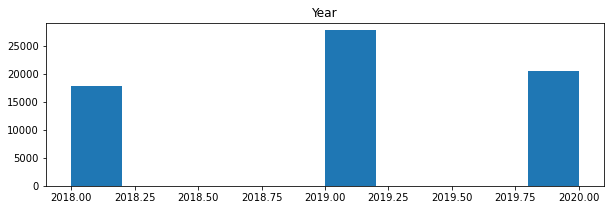

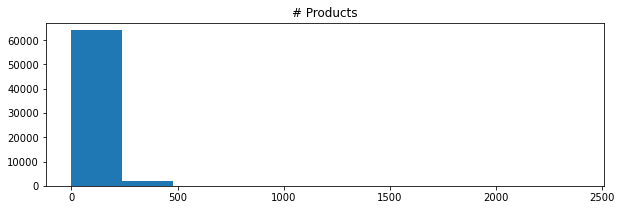

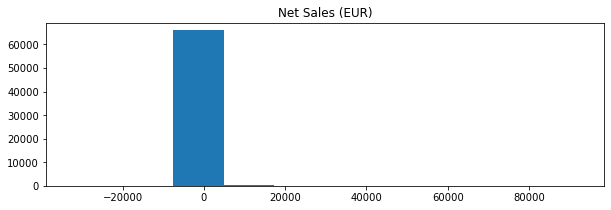

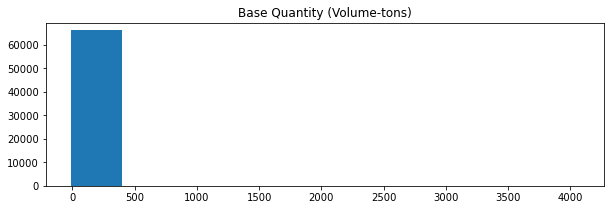

In [542]:
for col in vendas.columns: 
    if vendas.dtypes[col] in ('int64','float64'):
        fig = plt.figure(figsize =(10, 3))
        plt.title(col)
        pyplot.hist(vendas[col])
        pyplot.show()

Encerramos as análises da base de vendas e abaixo estão os principais pontos observados:
- A maior parte da receita e das toneladas vendidas tem como parceiros o Brasil, seguido da Argentina e outros países da Amérida do Sul.
- As toneladas vendidas caíram em todos os anos de 2018 a 2020, contudo, a receita das vendas aumentou de 2018 para 2019, mas caiu em 2020. 
- Essa distorção entre aumento de receita em 2019 e queda na tonelada vendida ocorre porque: <br>
 1) Os produtos mais baratos representam a maior parte da receita e tiveram reajustes consideráveis ao longo dos últimos anos. <br>
 2) Há um aumento de vendas dos produtos mais caros que impactaram positivamente a receita nos últimos anos, dentre estes produtos há verdadeiros outliers com o preço por tonelada muito superior ao restante da base.
- Um dos produtos mais baratos representa 24% dos pedidos.
- A base de clientes é bastante diversificada, evidenciando uma carteira sólida e segura. 

### Analise da Base de NPS

In [543]:
nps.shape

(39581, 24)

In [544]:
nps.dtypes

Survey ID                                                      int64
Contact Country                                               object
Job Title                                                     object
Contact Department                                            object
Sold to                                                       object
Lead Contact OD                                               object
Main Industry                                                 object
Customer Network                                              object
Local Invitation Date                                 datetime64[ns]
Survey status                                                 object
Local Response Date                                   datetime64[ns]
Likelihood to Recommend                                      float64
Ease of doing business                                       float64
Issue Resolution                                             float64
Product Quality                   

In [545]:
nps.isnull().sum()

Survey ID                                                 0
Contact Country                                           0
Job Title                                                21
Contact Department                                       15
Sold to                                                   0
Lead Contact OD                                           1
Main Industry                                          1297
Customer Network                                          0
Local Invitation Date                                     0
Survey status                                             0
Local Response Date                                   27041
Likelihood to Recommend                               26680
Ease of doing business                                27166
Issue Resolution                                      27099
Product Quality                                       27094
Delivery Reliability                                  27105
Understanding your business needs       

Há muitos registros sem a nota de NPS, iremos desconsiderar todos estes afinal é a variável mais importante do modelo.

In [546]:
nps = nps[nps['Likelihood to Recommend'].notnull()] 

In [547]:
nps.isnull().sum()

Survey ID                                                 0
Contact Country                                           0
Job Title                                                 6
Contact Department                                        6
Sold to                                                   0
Lead Contact OD                                           0
Main Industry                                           457
Customer Network                                          0
Local Invitation Date                                     0
Survey status                                             0
Local Response Date                                     362
Likelihood to Recommend                                   0
Ease of doing business                                  486
Issue Resolution                                        419
Product Quality                                         414
Delivery Reliability                                    425
Understanding your business needs       

Como a ideia é verificar se a nota do ano anterior reflete uma possível queda de venda no ano seguinte e a base de vendas vai apenas até 2020, iremos considerar somente as notas de NPS de 2019.

In [548]:
nps_19 = nps[nps['Local Response Date'].dt.strftime('%Y-%m-%d') < '2020-01-01']
nps_19 = nps[nps['Local Response Date'].dt.strftime('%Y-%m-%d') > '2018-12-31']

In [550]:
nps_19.isnull().sum()

Survey ID                                                 0
Contact Country                                           0
Job Title                                                 5
Contact Department                                        5
Sold to                                                   0
Lead Contact OD                                           0
Main Industry                                           445
Customer Network                                          0
Local Invitation Date                                     0
Survey status                                             0
Local Response Date                                       0
Likelihood to Recommend                                   0
Ease of doing business                                  130
Issue Resolution                                         64
Product Quality                                          58
Delivery Reliability                                     69
Understanding your business needs       

#### Excluindo colunas desnecessárias

In [551]:
nps_19.drop(columns=['Survey ID','Local Invitation Date','Survey status','Local Response Date','Current status of alert','Local Rapid Response Sent Date','Due Date 20d','Local Alert Closed Date'],inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [552]:
nps_19.head(2)

,Contact Country,Job Title,Contact Department,Sold to,Lead Contact OD,Main Industry,Customer Network,Likelihood to Recommend,Ease of doing business,Issue Resolution,Product Quality,Delivery Reliability,Understanding your business needs,Alert type,What was the result of the follow-up conversation?,Outerloop Activity
3,Brazil,Manager,Others,2501948,CM - Monomers,Chemicals & Plastics,No,8.0,10.0,9.0,10.0,7.0,10.0,Passive,NaN,NaN
4,Brazil,Manager,Supply Chain,1323633,CM - Monomers,Chemicals & Plastics,No,10.0,10.0,10.0,10.0,10.0,10.0,Promoter,No issues,NaN


### Analisando a classificação da nota de NPS com as variaveis númericas

<Figure size 800x640 with 0 Axes>

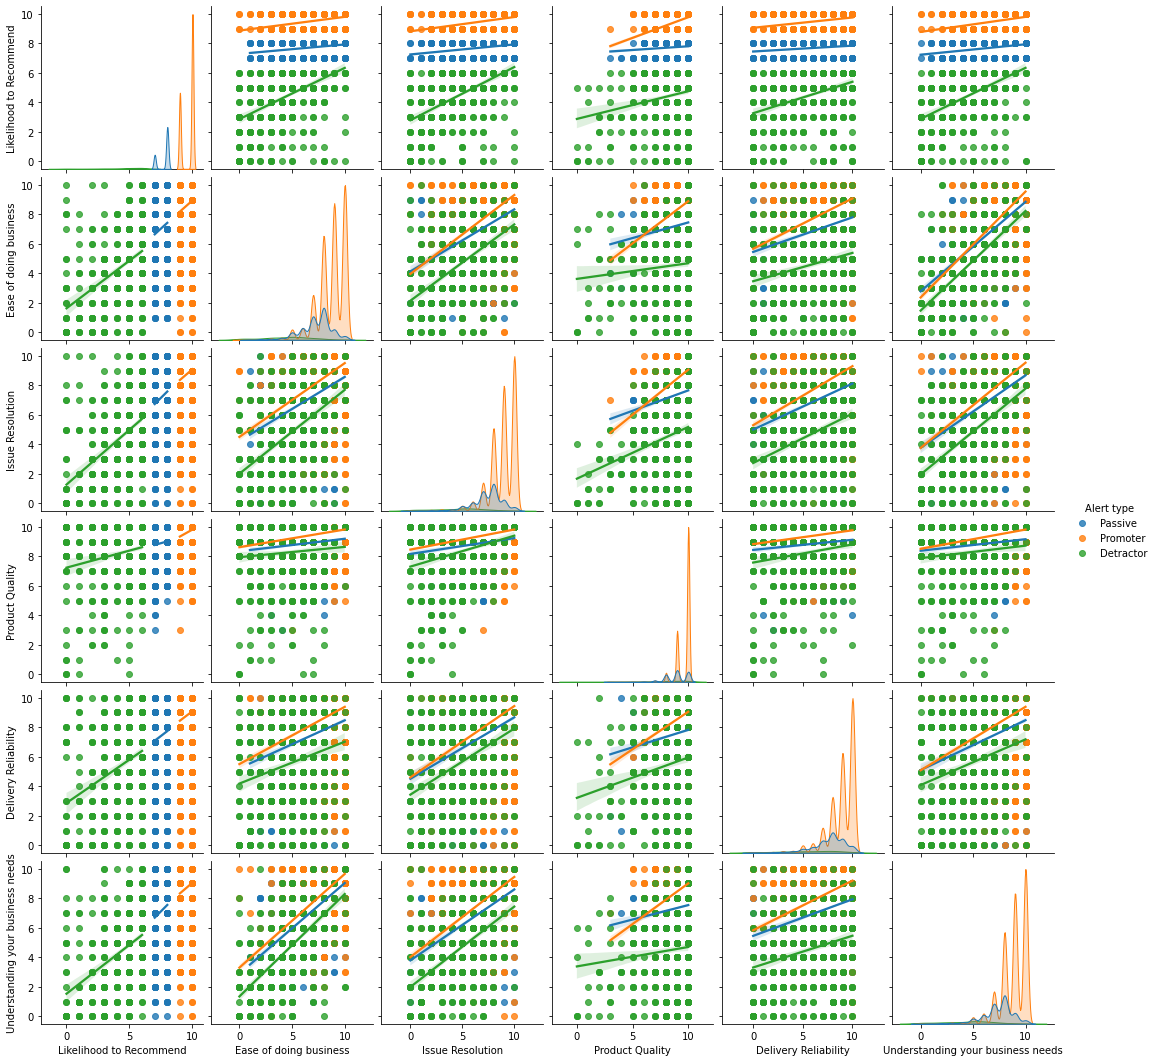

In [553]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(nps_19, kind="reg", hue="Alert type")
plt.show()

As notas de uma forma geral foram boas para praticamente todas as categorias, incluindo a principal ("Likehood to recommend") com muitos promotores, alguns neutros e poucos detratotores.

#### Analisando a classificação da nota com as variáveis categóricas

In [554]:
cols = ['Contact Country ','Contact Department','Lead Contact OD','Main Industry','Customer Network','What was the result of the follow-up conversation?','Outerloop Activity']

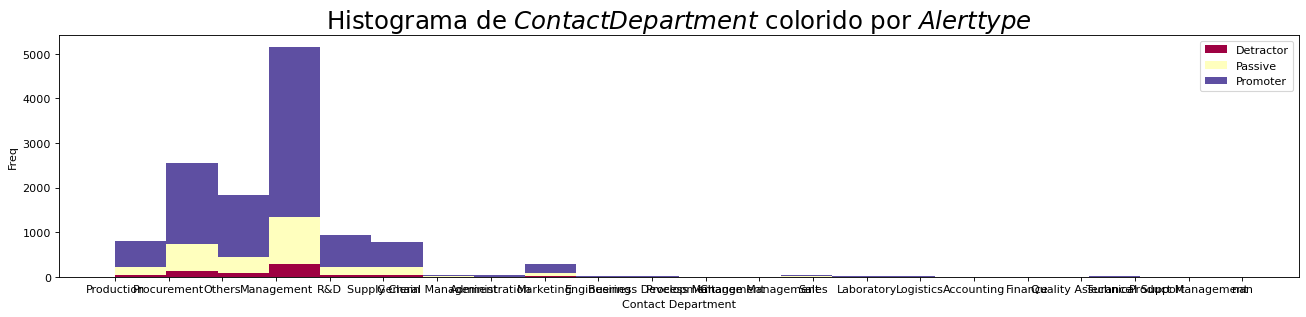

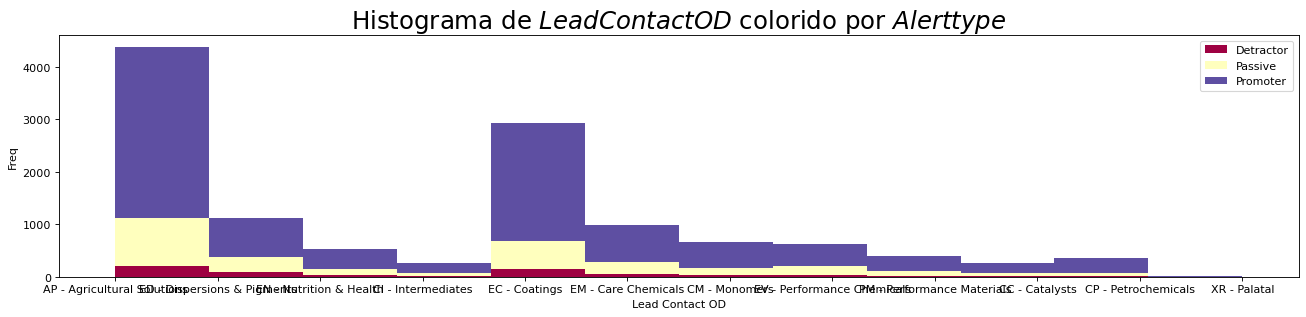

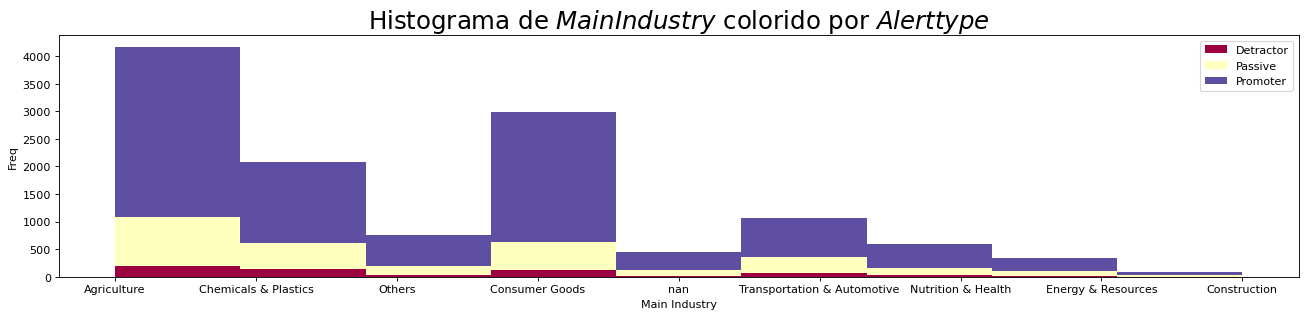

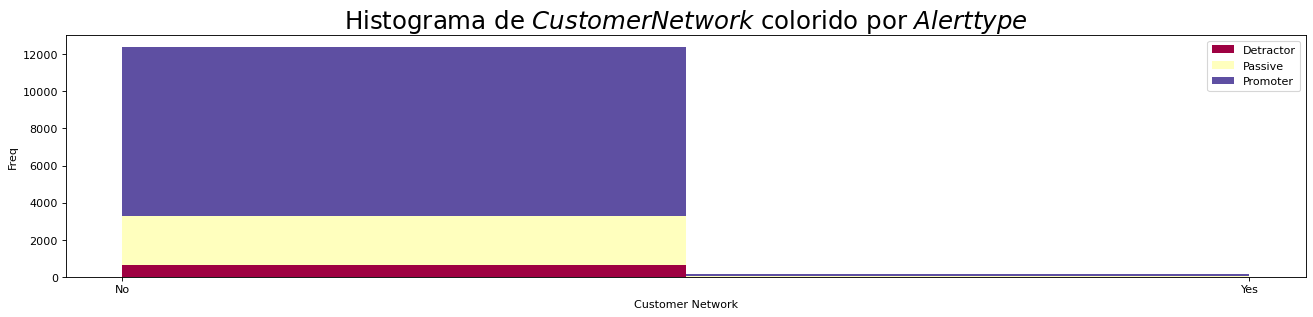

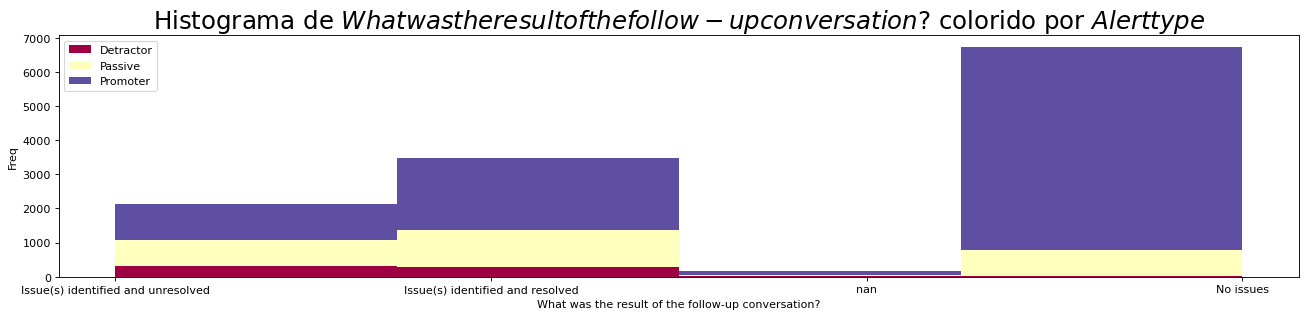

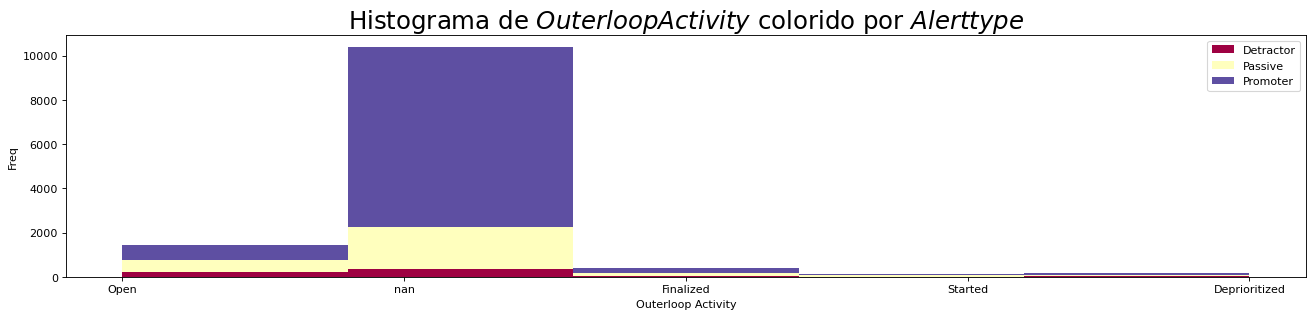

In [555]:
df = nps_19.copy()
for col in df.columns:
    if col in cols:
        groupby_var = 'Alert type'
        df_agg = df.loc[:, [col, groupby_var]].groupby(groupby_var)
        vals = [df[col].values.tolist() for i, df in df_agg]
        plt.figure(figsize=(20,4), dpi= 80)
        n, bins, patches = plt.hist(vals, df[col].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])
        plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
        plt.title(f"Histograma de ${col}$ colorido por ${groupby_var}$", fontsize=22)
        plt.xlabel(col)
        plt.ylabel("Freq")
        plt.show()

De uma forma geral a proporção entre as categorias de notas (promotores, passivos e detratores) se mantem para praticamente todas as categorias das variaveis categóricas, a única distorção percebida é que para a variavel "whatwastheresultoffollowupconversation" quando ocorre algum problema passado no follow up a proporção de detratores é significamente maior do que quando não há problemas, e se o problema não for resolvido a proporção de detratores é ainda maior.

Agora que as duas tabelas foram analisadas iniciaremos a preparação para o cruzamento de ambas.

#### Criando tabela auxiliar para identificar quem teve queda de vendas de 2019 para 2020

In [556]:
!pip install pandasql
from pandasql import sqldf

In [557]:
vendas.drop_duplicates(inplace=True)
vendas.rename(columns={"Sold-to Code (Number version)": "sold_to","# Products": "Products","Net Sales (EUR)": "net_sales","Base Quantity (Volume-tons)": "quantity_vol_tons"},inplace=True)

estrutura = sqldf("SELECT DISTINCT a.SBU,a.Country,a.sold_to,a.Products FROM vendas a")

vendas_por_ano = sqldf("SELECT          a.* , \
                                        b.net_sales as net_sales_19, \
                                        c.net_sales as net_sales_20, \
                                        b.quantity_vol_tons as quantity_vol_tons_19, \
                                        c.quantity_vol_tons as quantity_vol_tons_20 \
                        FROM estrutura a \
                        LEFT JOIN (SELECT * FROM vendas where Year = 2019) b on (a.SBU = b.SBU and  \
                                                       a.Country = b.Country and \
                                                       a.sold_to = b.sold_to and \
                                                       a.Products = b.Products) \
                        LEFT JOIN (SELECT * FROM vendas where Year = 2020) c on (a.SBU = c.SBU and \
                                                         a.Country = c.Country and \
                                                         a.sold_to = c.sold_to and \
                                                         a.Products = c.Products)")


In [558]:
vendas_por_ano

,SBU,Country,sold_to,Products,net_sales_19,net_sales_20,quantity_vol_tons_19,quantity_vol_tons_20
0,APF,Argentina,1000,1,NaN,NaN,NaN,NaN
1,APF,Argentina,629929,6,NaN,NaN,NaN,NaN
2,APF,Argentina,845310,8,NaN,NaN,NaN,NaN
3,APF,Argentina,857089,35,NaN,NaN,NaN,NaN
4,APF,Argentina,952150,36,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
59781,ECD,Brazil,6896723,200,NaN,-21.67698,NaN,0.000000
59782,ECD,Brazil,6936860,172,NaN,-2.91278,NaN,0.000000
59783,ECD,Brazil,6946449,263,NaN,-7.11949,NaN,0.000000
59784,ECD,Brazil,6946450,247,NaN,-3.72265,NaN,0.000000


In [559]:
vendas_por_ano['net_sales_20'] = vendas_por_ano['net_sales_20'].astype(float)
vendas_por_ano['quantity_vol_tons_20'] = vendas_por_ano['quantity_vol_tons_20'].astype(float)
vendas_por_ano['queda'] = np.where((vendas_por_ano['net_sales_19'] > vendas_por_ano['net_sales_20']) |  
                                   #(vendas_por_ano['quantity_vol_tons_19'] > vendas_por_ano['quantity_vol_tons_20']) | 
                                   (vendas_por_ano['net_sales_19'] > 0 & vendas_por_ano['net_sales_20'].isnull()), 1, 0)
                                   #(vendas_por_ano['quantity_vol_tons_19'] > 0 & vendas_por_ano['quantity_vol_tons_20'].isnull()), 1, 0)
clientes_quedas = vendas_por_ano.query('queda == 1')['sold_to'].drop_duplicates().reset_index()
clientes_quedas['queda'] = 1
clientes_quedas

,index,sold_to,queda
0,15,952455,1
1,23,952576,1
2,38,952888,1
3,39,952912,1
4,51,953597,1
...,...,...,...
9660,54927,6602461,1
9661,54929,6661527,1
9662,54938,6844535,1
9663,54939,6848428,1


In [560]:
nps_19.rename(columns={"Sold to": "sold_to","Local Response Date": "Local_Response_Date"},inplace=True)
nps_19_v2 = sqldf("SELECT a.*,b.queda from nps_19 a left join clientes_quedas b on (a.sold_to = b.sold_to)")
nps_19_v2['queda'] = nps_19_v2['queda'].replace(np.nan, 0)
nps_19_v2

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Contact Country,Job Title,Contact Department,sold_to,Lead Contact OD,Main Industry,Customer Network,Likelihood to Recommend,Ease of doing business,Issue Resolution,Product Quality,Delivery Reliability,Understanding your business needs,Alert type,What was the result of the follow-up conversation?,Outerloop Activity,queda
0,Brazil,Manager,Others,2501948,CM - Monomers,Chemicals & Plastics,No,8.0,10.0,9.0,10.0,7.0,10.0,Passive,None,None,1.0
1,Brazil,Manager,Supply Chain,1323633,CM - Monomers,Chemicals & Plastics,No,10.0,10.0,10.0,10.0,10.0,10.0,Promoter,No issues,None,1.0
2,Brazil,Director,Management,2501948,CM - Monomers,Chemicals & Plastics,No,8.0,10.0,10.0,10.0,5.0,10.0,Passive,None,None,1.0
3,Brazil,Ms,Procurement,914773,EV - Performance Chemicals,Energy & Resources,No,8.0,5.0,7.0,9.0,7.0,8.0,Passive,None,None,1.0
4,Brazil,Tecnico,R&D,914773,EV - Performance Chemicals,Energy & Resources,No,9.0,8.0,9.0,9.0,7.0,8.0,Promoter,None,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12534,Brazil,Analyst,Supply Chain,2501854,CM - Monomers,Chemicals & Plastics,No,9.0,10.0,9.0,10.0,10.0,10.0,Promoter,No issues,None,1.0
12535,Brazil,Manager,Procurement,921700,CM - Monomers,Energy & Resources,No,9.0,9.0,9.0,10.0,9.0,9.0,Promoter,No issues,None,1.0
12536,Brazil,Analyst,R&D,1568982,CM - Monomers,Others,No,10.0,9.0,9.0,10.0,9.0,9.0,Promoter,Issue(s) identified and unresolved,Open,1.0
12537,Brazil,Manager,Management,1680070,CM - Monomers,Consumer Goods,No,10.0,8.0,9.0,10.0,9.0,8.0,Promoter,No issues,None,1.0


In [561]:
nps_19_v2['queda'].value_counts()

1.0    10200
0.0     2339
Name: queda, dtype: int64

#### Tratamentos finais

In [562]:
nps_19_v2['Outerloop Activity'].fillna('0', inplace=True)

In [563]:
nps_19_v2.dropna(inplace=True)

#### Gerando dummies

In [564]:
for col in nps_19_v2.columns: 
    if nps_19_v2.dtypes[col] == 'object':
        nps_19_v2 = pd.get_dummies(nps_19_v2, columns=[col])

Realizaremos agora um teste de modelo apenas para verificar se será possível construir um modelo satisfatório no andamento do projeto.

#### Divisão em treino e teste

In [565]:
x = nps_19_v2.drop(columns=["queda"])
y = nps_19_v2["queda"]

# Divisão de treino e teste, sendo 20% das amostras para teste
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.2,
                                                    random_state=42)

In [566]:
#Padronização
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [567]:
# Árvore 
tree = DecisionTreeClassifier()
tree.fit(x_train_scaled, y_train)
Y_pred_label = tree.predict(x_test_scaled)

In [568]:
# Qual a taxa de acerto? 
accuracy_score(y_test, Y_pred_label)

0.9410508329773601

#### Considerações Finais

Apesar do bom resultado apontado pelo modelo de teste, há pontos que devem ser levados em consideração:

- A base de NPS tem dados de 2019 a 2022
- A base de Vendas tem dados de 2018 a 2020
- Portanto só temos intersecção entre as bases nos anos de 2019 e 2020, por este motivo optamos em trabalhar apenas com a base de nps de 2019 para verificar se as notas deste ano de alguma forma previam uma queda de receita para 2020.

Ao seguir desta forma identificamos que 82% dos clientes trouxeram menos receita em 2020, isso ocorreu muito mais porque foram impactados pela pandemia do que por qualquer problema que possam ter tido com a BASF. Tal fato prejudicou não só o equilíbrio da variável resposta na base mas trouxe um modelo completamente enviesado para um ano atípico como foi 2020 por conta do COVID.

Esta análise preliminar foi extremamente importante para identificarmos este grande problema em seguirmos com esta ideia para o projeto, e entendemos que o ideal seria recebermos os dados de vendas 2021 ou dados de NPS de 2018 para neutralizarmos um pouco o efeito da pandemia sobre o modelo.

In [573]:
print("Proporção de clientes que trouxeram menos receita em 2020: ")
nps_19_v2['queda'].value_counts(normalize=True)

Proporção de clientes que trouxeram menos receita em 2020: 


1.0    0.827023
0.0    0.172977
Name: queda, dtype: float64